## Imports

In [48]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
%autoreload 2

In [3]:
import os
import sys
project_root = os.path.abspath(os.path.join('..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [56]:
import warnings
warnings.simplefilter("ignore", UserWarning)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from engine.application import *
from engine.data_setup import *
from helper.utilities import *
%matplotlib inline

## Dataset Analysis

In [6]:
images = np.load('../npy_arrays/ee2v/images.npy')
masks = np.load('../npy_arrays/ee2v/masks.npy')

In [41]:
print(f"Number of images: {len(images)}")
print(f"Number of nonzero masks: {len([1 for mask in masks if mask.sum() != 0])}")

Number of images: 6819
Number of nonzero masks: 1690


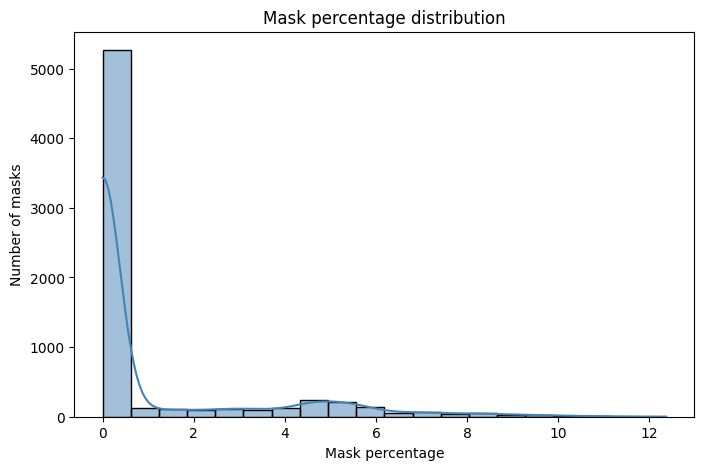

In [40]:
mask_percentages = [calculate_mask_percentage(i) for i in masks]

plt.figure(figsize=(8, 5))
sns.histplot(mask_percentages, bins=20, kde=True, color='steelblue')
plt.title('Mask percentage distribution')
plt.xlabel('Mask percentage')
plt.ylabel('Number of masks')
plt.show()

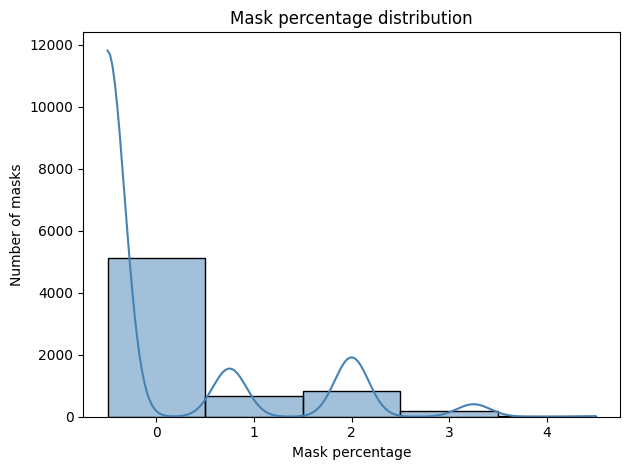

In [57]:
mask_bins = [get_bin(i, max_bins=5, top_bin_percentage=11) for i in masks]

hist = sns.histplot(mask_bins, bins=5, kde=True, color='steelblue')

bin_edges = hist.patches[0].get_x()
bin_width = hist.patches[0].get_width()

# Centering
bin_centers = [p.get_x() + p.get_width() / 2 for p in hist.patches]
plt.xticks(bin_centers, labels=[0, 1, 2, 3, 4])

plt.title('Mask percentage distribution')
plt.xlabel('Mask percentage')
plt.ylabel('Number of masks')

plt.tight_layout()
plt.show()